In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('chicago-crime-property.db')

# Read data from the database into a DataFrame
query = 'SELECT * FROM property_with_crime'
property_with_crime_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Assuming X and y are your feature matrix and target variable
X = property_with_crime_df[['beds', 'sqft', 'year_built', 'days_on_mls', 'latitude', 'longitude', 'sold_price', 'community', 'neighborhood']]
y = property_with_crime_df['crime_count']

# Separate numerical and categorical features
numerical_features = ['beds', 'sqft', 'year_built', 'days_on_mls', 'latitude', 'longitude', 'sold_price']
categorical_features = ['community', 'neighborhood']

# Create transformers for numerical and categorical features
numerical_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(drop='first')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the features
X_transformed = preprocessor.fit_transform(X)

# Calculate mutual information between features and target for a classifier
mutual_info = mutual_info_classif(X_transformed, y)

# Create a DataFrame to store feature names and their mutual information scores
feature_info_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Mutual_Information': mutual_info})

# Sort features by mutual information score
feature_info_df = feature_info_df.sort_values(by='Mutual_Information', ascending=False)

# Print the ranked features
print(feature_info_df)

In [1]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('chicago-crime-property.db')

# Read data from the database into a DataFrame
query = 'SELECT * FROM property_with_crime'
property_with_crime_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Check basic statistics
print("Basic Statistics of Target Variable:")
print(property_with_crime_df['crime_count'].describe())

Basic Statistics of Target Variable:
count    313419.000000
mean       5147.207342
std        3302.427075
min         262.000000
25%        2368.000000
50%        4347.000000
75%        7940.000000
max       12420.000000
Name: crime_count, dtype: float64


In [1]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
# Connect to the database
conn = sqlite3.connect('chicago-crime-property.db')

# Read data from the database into a DataFrame
query = 'SELECT * FROM property_with_crime'
property_with_crime_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Replace -1 with NaN in the 'year_built' column
property_with_crime_df['year_built'].replace(-1, pd.NA, inplace=True)

# One-hot encode the 'neighborhood' column
X = pd.get_dummies(property_with_crime_df[['longitude', 'latitude', 'sold_price', 'year_built', 'neighborhood']])
y = property_with_crime_df['crime_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the 'year_built' column
imputer = SimpleImputer(strategy='mean')
X_train_scaled[:, 3:4] = imputer.fit_transform(X_train_scaled[:, 3:4])
X_test_scaled[:, 3:4] = imputer.transform(X_test_scaled[:, 3:4])

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

# Evaluate the performance on the training set
y_pred_train = nb_classifier.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {accuracy_train}')

# Print classification report for training set
print('Training Classification Report:')
print(classification_report(y_train, y_pred_train))

# Evaluate the performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_nb)
print(f'Test Accuracy: {accuracy_test}')

# Print classification report for test set
print('Test Classification Report:')
print(classification_report(y_test, y_pred_nb))


r2 = r2_score(y_test, y_pred_nb)
print(f'R-squared Score: {r2}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_nb))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming y_test and y_pred_final are defined
mape = mean_absolute_percentage_error(y_test, y_pred_nb)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')




Accuracy: 0.9953736200625359
Classification Report:
              precision    recall  f1-score   support

         262       1.00      0.99      1.00       334
         357       1.00      1.00      1.00        49
         494       1.00      1.00      1.00       479
         519       1.00      0.99      1.00       466
         678       1.00      0.98      0.99        58
         707       1.00      0.99      0.99       242
         764       1.00      1.00      1.00       208
         921       1.00      0.99      0.99       300
         966       1.00      0.99      0.99        88
         989       1.00      0.99      0.99       230
         995       1.00      0.99      1.00       500
        1015       1.00      0.99      0.99        98
        1022       1.00      0.99      0.99       170
        1031       1.00      0.99      0.99       273
        1109       1.00      0.98      0.99       222
        1133       1.00      0.99      1.00       576
        1151       1.00      

In [29]:
# After one-hot encoding the 'neighborhood' column
X = pd.get_dummies(property_with_crime_df[['longitude', 'latitude', 'sold_price', 'year_built', 'neighborhood']])

# Get the feature names
feature_names = X.columns

# Save the feature names to a text file
with open('feature_names.txt', 'w') as file:
    for feature in feature_names:
        file.write(feature + '\n')

# Print a message indicating the file has been saved
print("Feature names saved to 'feature_names.txt'")



Feature names saved to 'feature_names.txt'


In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the average value of y_train
y_train_avg = np.mean(y_train)

# Create a prediction set with the average values
y_pred_baseline = np.full_like(y_train, y_train_avg)

# Calculate metrics for the baseline model
mse_baseline = mean_squared_error(y_train, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Baseline Model Metrics:")
print(f"Mean Squared Error (MSE): {mse_baseline}")
print(f"Root Mean Squared Error (RMSE): {rmse_baseline}")
print(f"Mean Absolute Error (MAE): {mae_baseline}")


Baseline Model Metrics:
Mean Squared Error (MSE): 10914079.244880052
Root Mean Squared Error (RMSE): 3303.646355904344
Mean Absolute Error (MAE): 2779.0160408399306


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('chicago-crime-property.db')

# Read data from the database into a DataFrame
query = 'SELECT * FROM property_with_crime'
property_with_crime_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Assuming X and y are your feature matrix and target variable
X = property_with_crime_df[['beds', 'sqft', 'year_built', 'days_on_mls', 'latitude', 'longitude', 'crime_count', 'community', 'neighborhood']]
y = property_with_crime_df['sold_price']

# Separate numerical and categorical features
numerical_features = ['beds', 'sqft', 'year_built', 'days_on_mls', 'latitude', 'longitude', 'sold_price']
categorical_features = ['community', 'neighborhood']

# Create transformers for numerical and categorical features
numerical_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(drop='first')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the features
X_transformed = preprocessor.fit_transform(X)

# Calculate mutual information between features and target
mutual_info = mutual_info_regression(X_transformed, y)

# Create a DataFrame to store feature names and their mutual information scores
feature_info_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Mutual_Information': mutual_info})

# Sort features by mutual information score
feature_info_df = feature_info_df.sort_values(by='Mutual_Information', ascending=False)

# Print the ranked features
print(feature_info_df)


In [3]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Connect to the database
conn = sqlite3.connect('chicago-crime-property.db')

# Read data from the database into a DataFrame
query = 'SELECT * FROM property_with_crime'
property_with_crime_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Replace -1 with NaN in the 'year_built' column
property_with_crime_df['year_built'].replace(-1, pd.NA, inplace=True)

# One-hot encode the 'neighborhood' column
X = pd.get_dummies(property_with_crime_df[['longitude', 'latitude', 'sold_price', 'year_built', 'neighborhood']])
y = property_with_crime_df['crime_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the 'year_built' column
imputer = SimpleImputer(strategy='mean')
X_train_scaled[:, 3:4] = imputer.fit_transform(X_train_scaled[:, 3:4])
X_test_scaled[:, 3:4] = imputer.transform(X_test_scaled[:, 3:4])

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter based on your needs

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the performance
final_mse = mean_squared_error(y_test, y_pred_ridge)
print(f'Final Mean Squared Error: {final_mse}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

r2 = r2_score(y_test, y_pred_ridge)
print(f'R-squared Score: {r2}')

def mean_absolute_percentage_error(y_true, y_pred_ridge): 
    y_true, y_pred = np.array(y_true), np.array(y_pred_ridge)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming y_test and y_pred_final are defined
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Evaluate training set performance
y_pred_train_ridge = ridge_model.predict(X_train_scaled)
final_mse_train = mean_squared_error(y_train, y_pred_train_ridge)
print(f'Final Mean Squared Error (Training): {final_mse_train}')

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
print(f'Root Mean Squared Error (RMSE) (Training): {rmse_train:.2f}')

r2_train = r2_score(y_train, y_pred_train_ridge)
print(f'R-squared Score (Training): {r2_train}')

# Calculate MAPE for training set
mape_train = mean_absolute_percentage_error(y_train, y_pred_train_ridge)
print(f'Mean Absolute Percentage Error (MAPE) (Training): {mape_train:.2f}%')

import joblib

# Save the Ridge model using Joblib with ".sav" extension
joblib.dump(ridge_model, 'ridge_model.sav')

print("Model has been saved as 'ridge_model.sav'")


Final Mean Squared Error: 0.0007611835292461818
Root Mean Squared Error (RMSE): 0.03
R-squared Score: 0.9999999999299973
Mean Absolute Percentage Error (MAPE): 0.00%
Final Mean Squared Error (Training): 0.0007530614252505726
Root Mean Squared Error (RMSE) (Training): 0.03
R-squared Score (Training): 0.999999999931001
Mean Absolute Percentage Error (MAPE) (Training): 0.00%
Model has been saved as 'ridge_model.sav'


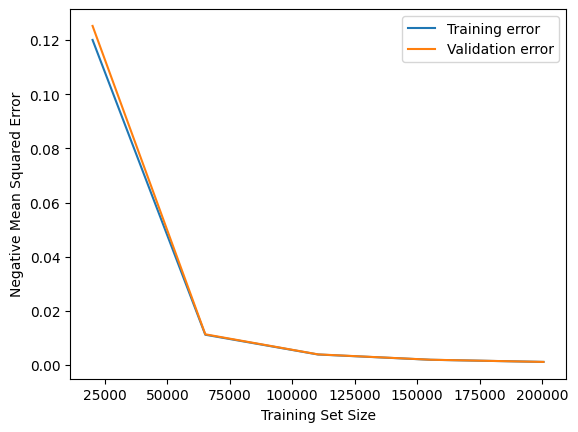

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean scores and standard deviations
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.show()


In [5]:
# Calculate the mean of y_train
y_train_mean = np.mean(y_train)

# Create a "prediction" set with the mean values
y_pred_mean = np.full_like(y_test, fill_value=y_train_mean)

# Evaluate the performance for the mean prediction
mse_mean = mean_squared_error(y_test, y_pred_mean)
print(f'Mean Squared Error (Mean Prediction): {mse_mean}')

r2_mean = r2_score(y_test, y_pred_mean)
print(f'R-squared Score (Mean Prediction): {r2_mean}')

mape_mean = mean_absolute_percentage_error(y_test, y_pred_mean)
print(f'Mean Absolute Percentage Error (MAPE) (Mean Prediction): {mape_mean:.2f}%')


Mean Squared Error (Mean Prediction): 10873639.377528556
R-squared Score (Mean Prediction): -8.73112076638094e-07
Mean Absolute Percentage Error (MAPE) (Mean Prediction): 110.99%


Our model focuses on predicting crime counts (crime_count) based on various housing-related features, 
including geographical information (longitude, latitude), sold prices (sold_price), and the year of construction (year_built).
While conventional models often predict housing prices, our approach seeks to understand how housing information may influence crime counts in 
the city of Chicago.
Conclusion:



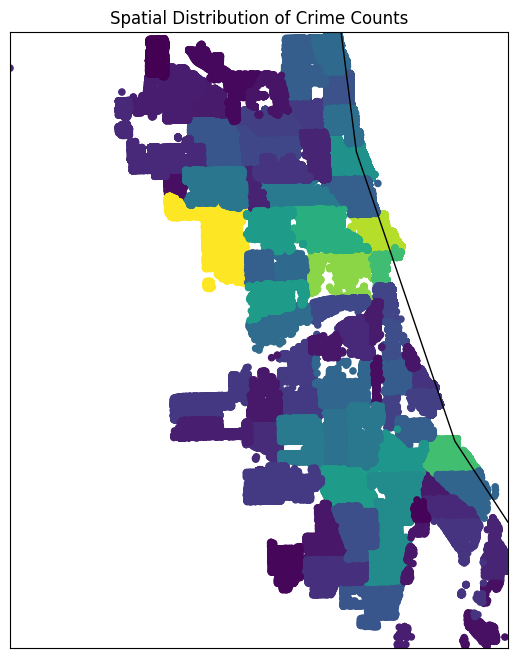

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Plot a scatter plot for longitude and latitude
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=property_with_crime_df['latitude'].min(), urcrnrlat=property_with_crime_df['latitude'].max(),
            llcrnrlon=property_with_crime_df['longitude'].min(), urcrnrlon=property_with_crime_df['longitude'].max(), resolution='i')

m.scatter(property_with_crime_df['longitude'], property_with_crime_df['latitude'], latlon=True, c=property_with_crime_df['crime_count'], cmap='viridis', s=20)
m.drawcoastlines()
plt.title('Spatial Distribution of Crime Counts')
plt.show()


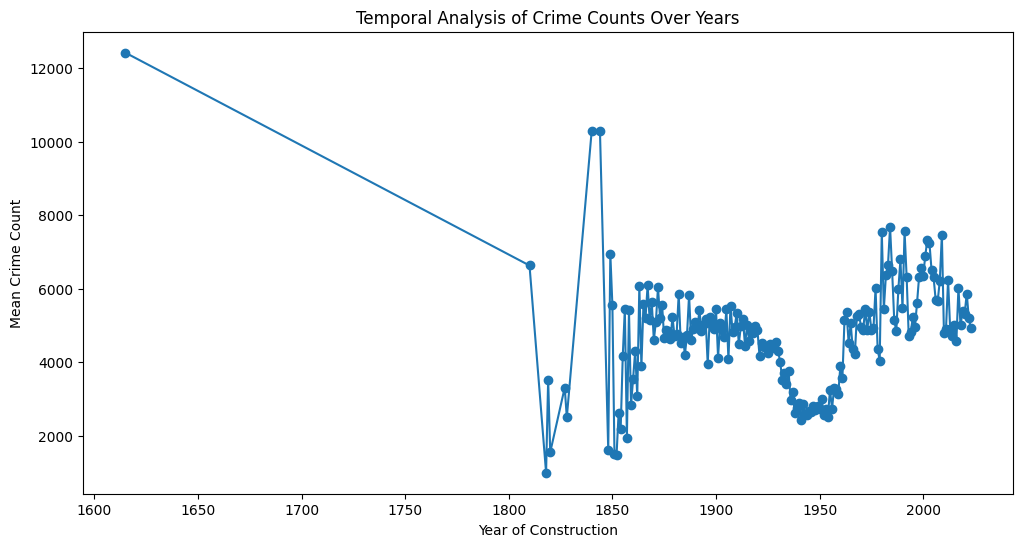

In [16]:
import matplotlib.pyplot as plt

# Create a time series plot
plt.figure(figsize=(12, 6))
property_with_crime_df.groupby('year_built')['crime_count'].mean().plot(marker='o')
plt.title('Temporal Analysis of Crime Counts Over Years')
plt.xlabel('Year of Construction')
plt.ylabel('Mean Crime Count')
plt.show()


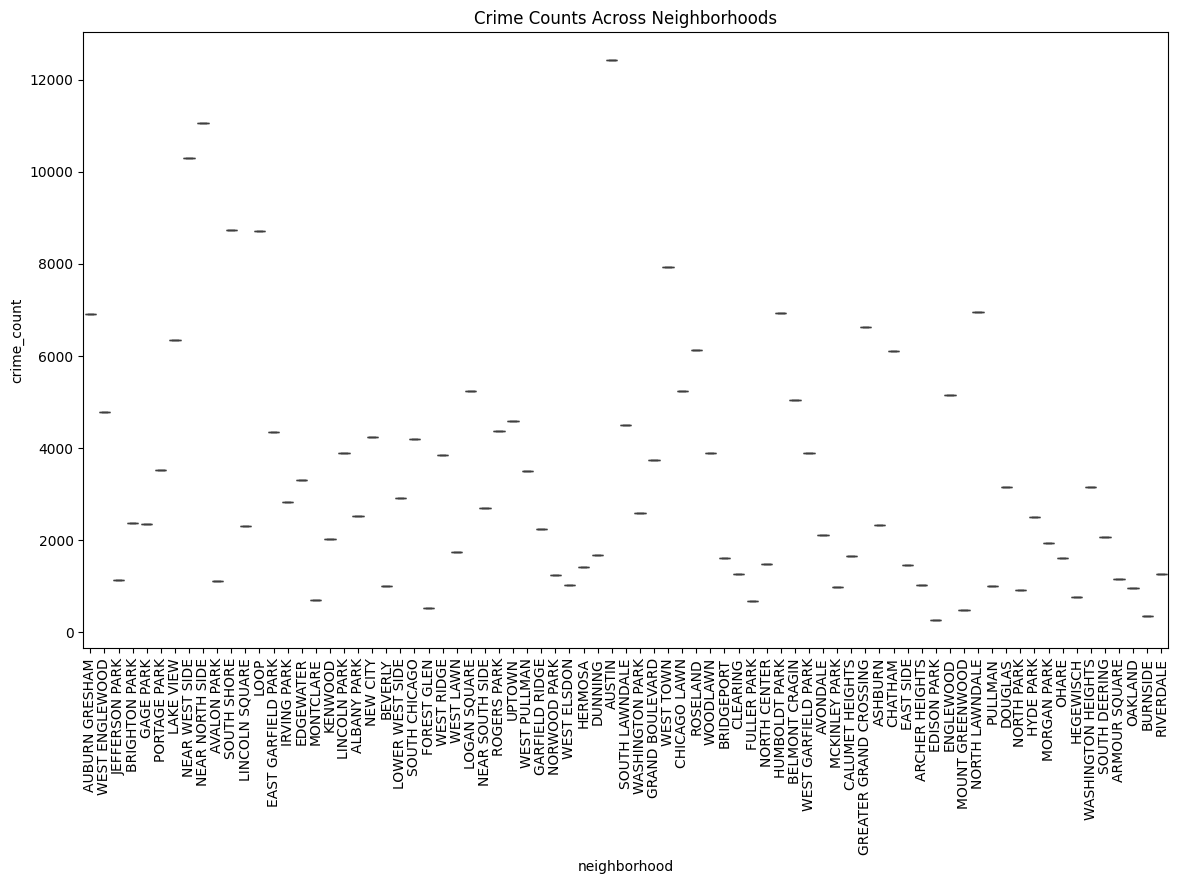

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for crime counts across neighborhoods
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighborhood', y='crime_count', data=property_with_crime_df)
plt.title('Crime Counts Across Neighborhoods')
plt.xticks(rotation=90)
plt.show()


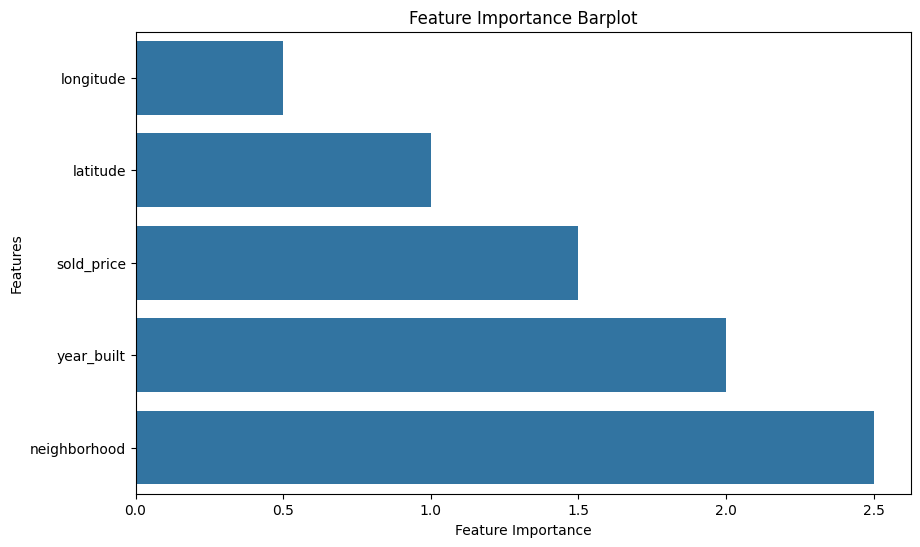

In [7]:

feature_importance_values = [.5, 1, 1.5, 2, 2.5]
features = ['longitude', 'latitude', 'sold_price', 'year_built', 'neighborhood']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_values, y=features, orient='h')
plt.title('Feature Importance Barplot')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()
